In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from scipy.ndimage.filters import gaussian_filter1d

%matplotlib inline

11.80992
43.96512
38.16464
11.80992
43.96512
38.16464


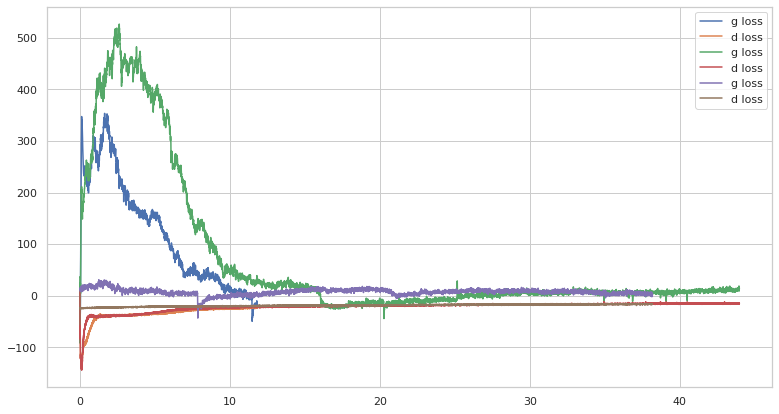

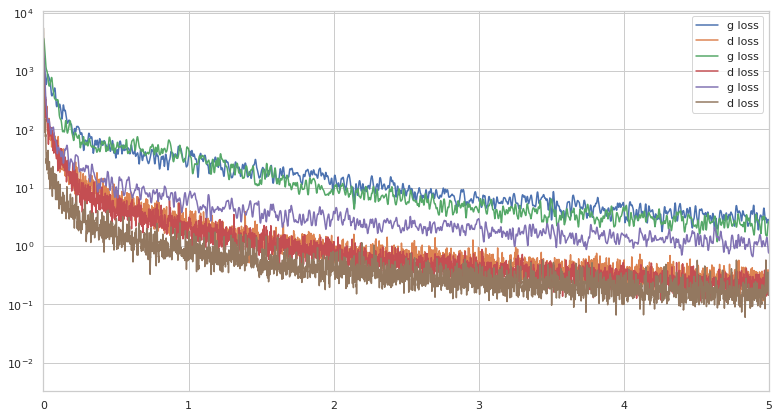

In [4]:
#experiment_ids= ["10db5b16bcf04ec7a686c31296a275e7","e5202767a9d34789a84d043abafc061e","73e65af9a5f24753bb1be0af03a21c99"]
experiment_ids = ["10db5b16bcf04ec7a686c31296a275e7",
                  "3c81fb870c154fe09c238c6641d74ff6"
                 , "6b813aa2f30148f1b8bd3ca4cd88c788"]
"73e65af9a5f24753bb1be0af03a21c99",
#experiment_id = "44bfcf5c9ff94ac08cba59f92a5f1e53"

sigma=5

sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(13, 7))
nsample = 6250
for experiment_id in experiment_ids:
    mlflow_dir = "/home/dwhan89/workspace/cosmikyu/output/mlruns/37/{}/metrics".format(experiment_id)
    #experiment_id= "63101414f2434a3e93cd28663a89f879"
    #mlflow_dir = "/home/dwhan89/workspace/cosmikyu/output/mlruns/30/{}/metrics".format(experiment_id)
    #nsample = 6250
    def mlflow_path(x):
        return os.path.join(mlflow_dir, x)


    g_loss = np.loadtxt(mlflow_path('G loss'))
    d_loss = np.loadtxt(mlflow_path('D loss'))

    xg = np.linspace(0, len(d_loss[:,0])/nsample, len(g_loss[:,0]))
    xd = np.linspace(0, len(d_loss[:,0])/nsample, len(d_loss[:,0])) 
    print(np.max(xg))


    plt.plot(xg, gaussian_filter1d(g_loss[:,1], sigma=sigma), label="g loss", alpha=1)
    plt.plot(xd, gaussian_filter1d(d_loss[:,1], sigma=sigma), label="d loss", alpha=1)
#plt.ylim(-100,100)
#plt.xlim(80000)
#plt.xlim(0,5)
plt.legend()

sigma=5
sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(13, 7))
for experiment_id in experiment_ids:
    mlflow_dir = "/home/dwhan89/workspace/cosmikyu/output/mlruns/37/{}/metrics".format(experiment_id)

    #experiment_id= "63101414f2434a3e93cd28663a89f879"
    #mlflow_dir = "/home/dwhan89/workspace/cosmikyu/output/mlruns/30/{}/metrics".format(experiment_id)
    #nsample = 6250
    def mlflow_path(x):
        return os.path.join(mlflow_dir, x)


    g_loss = np.loadtxt(mlflow_path('G loss'))
    d_loss = np.loadtxt(mlflow_path('D loss'))

    xg = np.linspace(0, len(d_loss[:,0])/nsample, len(g_loss[:,0]))
    xd = np.linspace(0, len(d_loss[:,0])/nsample, len(d_loss[:,0])) 
    print(np.max(xg))
    
    plt.plot((xg[:-1]+xg[1:])/2, (gaussian_filter1d(np.abs((g_loss[1:,1]-g_loss[:-1,1])/(xg[:-1]+xg[1:])), sigma=sigma)), label="g loss")
    plt.plot((xd[:-1]+xd[1:])/2, (gaussian_filter1d(np.abs((d_loss[1:,1]-d_loss[:-1,1])/(xd[:-1]+xd[1:])), sigma=sigma)), label="d loss")
    #plt.ylim(-50,50)
    #plt.xlim(80000)
plt.xlim(0,5)
#plt.xlim(0,1)
plt.yscale("log")

plt.legend()
